In [26]:
import pandas as pd
import webbrowser
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import os


file_path = "csv_2017_2022.csv"

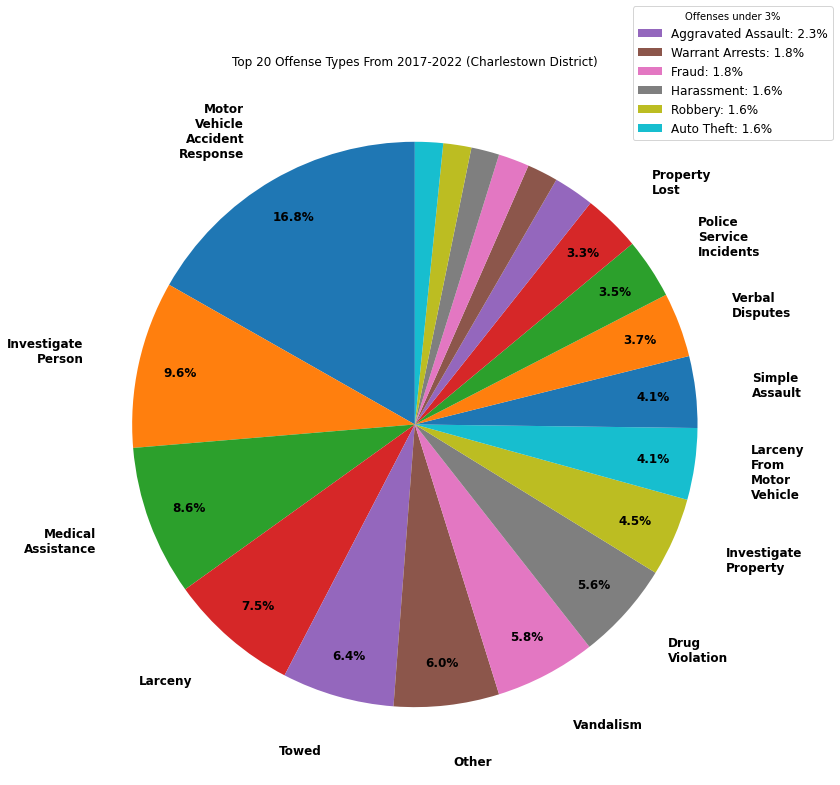

In [27]:



file_path = "csv_2017_2022.csv"
data = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})

Charlestown = {'A15'}
data['DISTRICT'] = data['DISTRICT'].astype(str).str.strip()  # Remove extra spaces
data = data[data['DISTRICT'].isin(Charlestown)]  # Filter valid districts

# Sort data
Charlestown_sorted_data = data.sort_values(by=['DISTRICT'], ascending=True)

# Drop unnecessary columns
Charlestown_sorted_data.drop([ 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                  'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Sample every 3rd row
sampled_data = Charlestown_sorted_data.iloc[::3]

offense_counts = sampled_data['OFFENSE_CODE_GROUP'].value_counts()

# Get the top 5 offense categories
top5 = offense_counts[:20].copy()

fig, ax = plt.subplots(figsize=(15, 13))

# Create a pie chart
def format_labels(label):
    # Here we add a line break after the first word if it's too long
    if len(label) > 10:  # Adjust this number based on how long your offense names are
        return '\n'.join(label.split())
    return label

percentages = top5 / top5.sum() * 100

# Define labels for percentages less than 3% as empty
labels = [format_labels(label) if percentage >= 3 else '' for label, percentage in zip(top5.index, percentages)]

# Function to hide percentages below 3%
def autopct_format(pct, allvalues):
    absolute = round(pct/100.*sum(allvalues), 1)
    if pct < 3:
        return ''  # Don't show the percentage if it's less than 3%
    else:
        return f'{pct:.1f}%'  # Show percentage for others

# Generate the pie chart with the percentage labels
patches, texts, autotexts = plt.pie(
    top5,
    labels=labels,   # Add line breaks for long names
    autopct=lambda pct: autopct_format(pct, top5),  # Conditionally format the percentage
    startangle=90,  # Start angle for the pie chart
    labeldistance=1.2,  # Increase distance between pie and labels
    pctdistance=0.85  # Adjust distance of percentages from the center
)

# Add the legend with categories under 3%
filtered_top5 = top5[percentages < 3]
filtered_percentages = percentages[percentages < 3]

legend_patches = [patches[i] for i in range(len(patches)) if top5.index[i] in filtered_top5.index]
legend_labels = [f"{filtered_top5.index[i]}: {filtered_percentages[i]:.1f}%" for i in range(len(filtered_top5))]

plt.legend(
    legend_patches,  
    legend_labels,   
    loc="best",      # Automatically chooses the best location
    fontsize=12,     
    title="Offenses under 3%",  # Optional: Title for the legend
    bbox_to_anchor=(1.1, 1.1)  # Optional: Places the legend outside of the chart area
)

plt.title('Top 20 Offense Types From 2017-2022 (Charlestown District)')

# Set font size and weight for pie chart labels
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')


plt.show()

#plt.savefig('Charletown_pi.jpg', format='jpg')


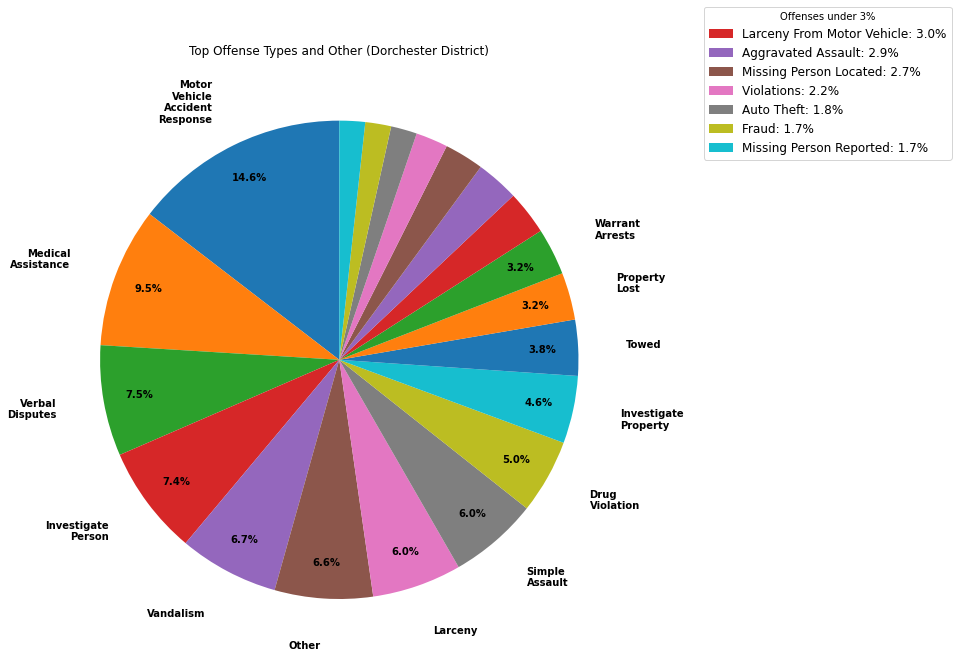

In [18]:
data = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})

"""
This is the graph that for Dorchester

"""
#data = data.dropna(subset=['DISTRICT'])  # Remove NaN values

Dorchester = {'C11'}
data['DISTRICT'] = data['DISTRICT'].astype(str).str.strip()  # Remove extra spaces
data = data[data['DISTRICT'].isin(Dorchester)]  # Filter valid districts

# Sort data
Dorchester_sorted_data = data.sort_values(by=['DISTRICT'], ascending=True)

# Replace district names with full names

# Drop unnecessary columns
Dorchester_sorted_data.drop(['SHOOTING', 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                  'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Sample every 3rd row
sampled_data = Dorchester_sorted_data.iloc[::3]

offense_counts = sampled_data['OFFENSE_CODE_GROUP'].value_counts()

# Get the top 5 offense categories
top5 = offense_counts[:20].copy()


# Create a pie chart
fig, ax = plt.subplots(figsize=(15, 13))

# Create a pie chart
def format_labels(label):
    # Here we add a line break after the first word if it's too long
    if len(label) > 10:  # Adjust this number based on how long your offense names are
        return '\n'.join(label.split())
    return label

percentages = top5 / top5.sum() * 100

# Define labels for percentages less than 3% as empty
labels = [format_labels(label) if percentage >= 3 else '' for label, percentage in zip(top5.index, percentages)]

# Function to hide percentages below 3%
def autopct_format(pct, allvalues):
    absolute = round(pct/100.*sum(allvalues), 1)
    if pct < 3:
        return ''  # Don't show the percentage if it's less than 3%
    else:
        return f'{pct:.1f}%'  # Show percentage for others

# Generate the pie chart with the percentage labels
patches, texts, autotexts = plt.pie(
    top5,
    labels=labels,   # Add line breaks for long names
    autopct=lambda pct: autopct_format(pct, top5),  # Conditionally format the percentage
    startangle=90,  # Start angle for the pie chart
    labeldistance=1.2,  # Increase distance between pie and labels
    pctdistance=0.85  # Adjust distance of percentages from the center
)

# Add the legend with categories under 3%
filtered_top5 = top5[percentages < 3]
filtered_percentages = percentages[percentages < 3]

legend_patches = [patches[i] for i in range(len(patches)) if top5.index[i] in filtered_top5.index]
legend_labels = [f"{filtered_top5.index[i]}: {filtered_percentages[i]:.1f}%" for i in range(len(filtered_top5))]

plt.legend(
    legend_patches,  
    legend_labels,   
    loc="best",      # Automatically chooses the best location
    fontsize=12,     
    title="Offenses under 3%",  # Optional: Title for the legend
    bbox_to_anchor=(1.1, 1.1)  # Optional: Places the legend outside of the chart area
)

plt.title('Top Offense Types and Other (Dorchester District)')

for text in texts + autotexts:
    text.set_fontsize(10)

    text.set_fontweight('bold')

 


plt.show()
#plt.savefig('Dorchester_pi.jpg', format='jpg')

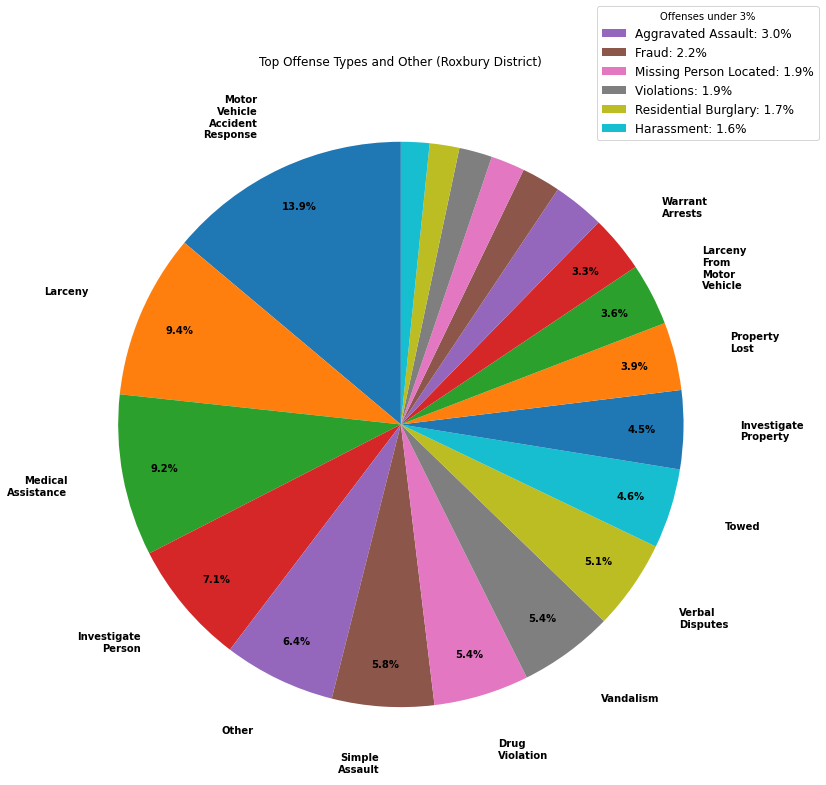

In [99]:
data = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})
"""
This is the graph that for Roxbury

"""
roxbury = {'B2'}

roxbury_sorted_data = data.sort_values(by=['DISTRICT'], ascending=True)

# Replace district names with full names
roxbury_sorted_data['DISTRICT'] = roxbury_sorted_data['DISTRICT'].replace({'B2': 'Roxbury'})

# Drop unnecessary columns
roxbury_sorted_data.drop(['SHOOTING', 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                  'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Sample every 3rd row
sampled_data = roxbury_sorted_data.iloc[::3]

offense_counts = sampled_data['OFFENSE_CODE_GROUP'].value_counts()

# Get the top 5 offense categories
top5 = offense_counts[:20].copy()


# Add the "Other" category to the top5 using pd.concat() instead of append
#other_series = pd.Series({'Other': other_sum})
#top5 = pd.concat([top5, other_series])

# Create a pie chart
fig, ax = plt.subplots(figsize=(15, 13))

# Create a pie chart
def format_labels(label):
    # Here we add a line break after the first word if it's too long
    if len(label) > 10:  # Adjust this number based on how long your offense names are
        return '\n'.join(label.split())
    return label

percentages = top5 / top5.sum() * 100

# Define labels for percentages less than 3% as empty
labels = [format_labels(label) if percentage >= 3 else '' for label, percentage in zip(top5.index, percentages)]

# Function to hide percentages below 3%
def autopct_format(pct, allvalues):
    absolute = round(pct/100.*sum(allvalues), 1)
    if pct < 3:
        return ''  # Don't show the percentage if it's less than 3%
    else:
        return f'{pct:.1f}%'  # Show percentage for others

# Generate the pie chart with the percentage labels
patches, texts, autotexts = plt.pie(
    top5,
    labels=labels,   # Add line breaks for long names
    autopct=lambda pct: autopct_format(pct, top5),  # Conditionally format the percentage
    startangle=90,  # Start angle for the pie chart
    labeldistance=1.2,  # Increase distance between pie and labels
    pctdistance=0.85  # Adjust distance of percentages from the center
)

# Add the legend with categories under 3%
filtered_top5 = top5[percentages < 3]
filtered_percentages = percentages[percentages < 3]

legend_patches = [patches[i] for i in range(len(patches)) if top5.index[i] in filtered_top5.index]
legend_labels = [f"{filtered_top5.index[i]}: {filtered_percentages[i]:.1f}%" for i in range(len(filtered_top5))]

plt.legend(
    legend_patches,  
    legend_labels,   
    loc="best",      # Automatically chooses the best location
    fontsize=12,     
    title="Offenses under 3%",  # Optional: Title for the legend
    bbox_to_anchor=(1.1, 1.1)  # Optional: Places the legend outside of the chart area
)



plt.title('Top Offense Types and Other (Roxbury District)')

for text in texts + autotexts:
    text.set_fontsize(10)

    text.set_fontweight('bold')


plt.show()
#plt.savefig('Roxbury.jpg', format='jpg')



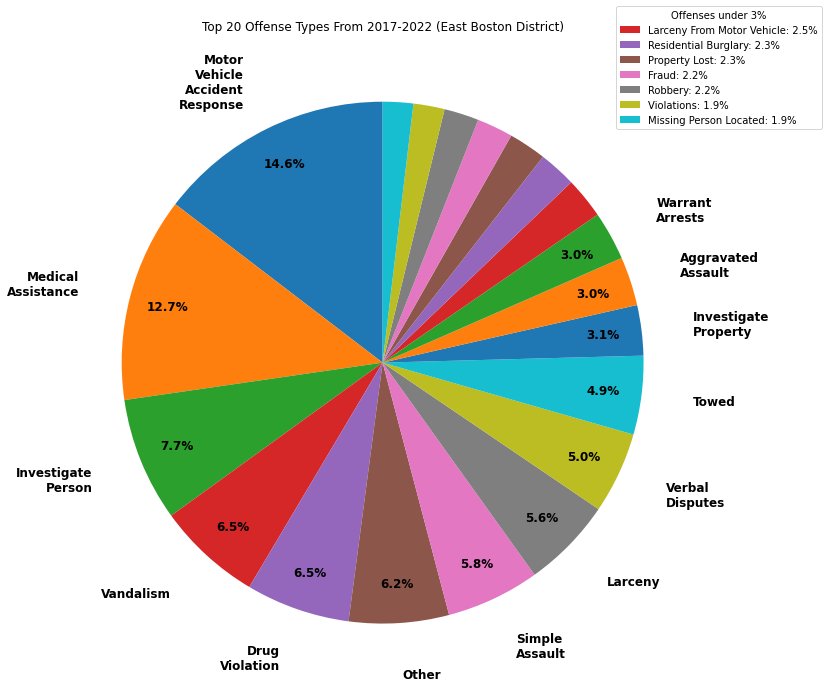

In [104]:




data = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})

"""
this is the east boston one:

"""

e_boston = {'A7'}
#data = data.dropna(subset=['DISTRICT'])  # Remove NaN values
# Remove extra spaces
data = data[data['DISTRICT'].isin(e_boston)]  # Filter valid districts

# Sort data
e_boston_sorted_data = data.sort_values(by=['DISTRICT'], ascending=True)

# Replace district names with full names
e_boston_sorted_data['DISTRICT'] = e_boston_sorted_data['DISTRICT'].replace({'B2': 'Roxbury'})

# Drop unnecessary columns
e_boston_sorted_data.drop(['SHOOTING', 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                  'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Sample every 3rd row
sampled_data = e_boston_sorted_data.iloc[::3]

offense_counts = sampled_data['OFFENSE_CODE_GROUP'].value_counts()

# Get the top 5 offense categories
top20 = offense_counts[:20].copy()

# Size of the Figure
fig, ax = plt.subplots(figsize=(13, 12))

# Create a pie chart
def format_labels(label):
    # Here we add a line break after the first word if it's too long
    if len(label) > 10:  # Adjust this number based on how long your offense names are
        return '\n'.join(label.split())
    return label

percentages = top20 / top20.sum() * 100

# Define labels for percentages less than 3% as empty
labels = [format_labels(label) if percentage >= 3 else '' for label, percentage in zip(top20.index, percentages)]

# Function to hide percentages below 3%
def autopct_format(pct, allvalues):
    if pct < 3:
        return ''  # Don't show the percentage if it's less than 3%
    else:
        return f'{pct:.1f}%'  # Show percentage for others

# Generate the pie chart with the percentage labels
patches, texts, autotexts = plt.pie(
    top20,
    labels=labels,  
    autopct=lambda pct: autopct_format(pct, top20),  
    startangle=90,  
    labeldistance=1.2,  
    pctdistance=0.85  
)

# Add the legend with categories under 3%
filtered_top5 = top20[percentages < 3]
filtered_percentages = percentages[percentages < 3]

legend_patches = [patches[i] for i in range(len(patches)) if top20.index[i] in filtered_top5.index]
legend_labels = [f"{filtered_top5.index[i]}: {filtered_percentages.iloc[i]:.1f}%" for i in range(len(filtered_top5))]

plt.legend(
    legend_patches,  
    legend_labels,   
    loc="best",      # Automatically chooses the best location
    fontsize=10,     
    title="Offenses under 3%",  
    bbox_to_anchor=(.85, .85)  
)

plt.title('Top 20 Offense Types From 2017-2022 (East Boston District)')

# Set font size and weight for pie chart labels
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.show()

#plt.savefig('E_Boston.jpg', format='jpg')


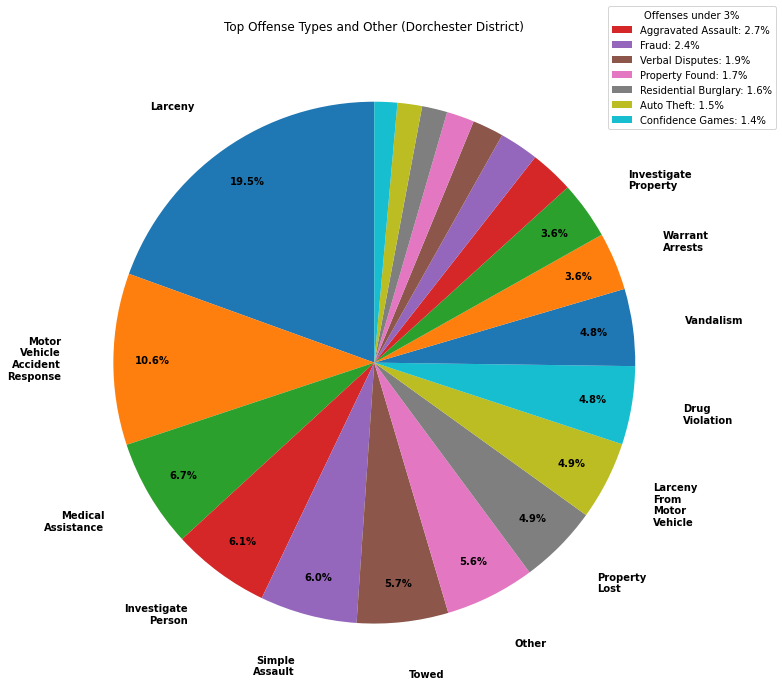

In [111]:
#This one isn't working: I don't know why


data = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})

"""
This is the graph that for Dorchester

"""
#data = data.dropna(subset=['DISTRICT'])  # Remove NaN values

Dorchester = {'C11'}
data['DISTRICT'] = data['DISTRICT'].astype(str).str.strip()  # Remove extra spaces
data = data[data['DISTRICT'].isin(Dorchester)]  # Filter valid districts

# Sort data
Dorchester_sorted_data = data.sort_values(by=['DISTRICT'], ascending=True)

# Replace district names with full names

# Drop unnecessary columns
Dorchester_sorted_data.drop(['SHOOTING', 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                  'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Sample every 3rd row
sampled_data = Dorchester_sorted_data.iloc[::3]

offense_counts = sampled_data['OFFENSE_CODE_GROUP'].value_counts()

# Get the top 5 offense categories
top5 = offense_counts[:20].copy()



# Add the "Other" category to the top5 using pd.concat() instead of append
#other_series = pd.Series({'Other': other_sum})
#top5 = pd.concat([top5, other_series])

# Create a pie chart
fig, ax = plt.subplots(figsize=(13, 12))

# Create a pie chart
def format_labels(label):
    # Here we add a line break after the first word if it's too long
    if len(label) > 10:  # Adjust this number based on how long your offense names are
        return '\n'.join(label.split())
    return label

percentages = top20 / top20.sum() * 100

# Define labels for percentages less than 3% as empty
labels = [format_labels(label) if percentage >= 3 else '' for label, percentage in zip(top20.index, percentages)]

# Function to hide percentages below 3%
def autopct_format(pct, allvalues):
    if pct < 3:
        return ''  # Don't show the percentage if it's less than 3%
    else:
        return f'{pct:.1f}%'  # Show percentage for others

# Generate the pie chart with the percentage labels
patches, texts, autotexts = plt.pie(
    top20,
    labels=labels,  
    autopct=lambda pct: autopct_format(pct, top20),  
    startangle=90,  
    labeldistance=1.2,  
    pctdistance=0.85  
)

# Add the legend with categories under 3%
filtered_top5 = top20[percentages < 3]
filtered_percentages = percentages[percentages < 3]

legend_patches = [patches[i] for i in range(len(patches)) if top20.index[i] in filtered_top5.index]
legend_labels = [f"{filtered_top5.index[i]}: {filtered_percentages.iloc[i]:.1f}%" for i in range(len(filtered_top5))]

plt.legend(
    legend_patches,  
    legend_labels,   
    loc="best",      # Automatically chooses the best location
    fontsize=10,     
    title="Offenses under 3%",  
    bbox_to_anchor=(.85, .85)  
)


plt.title('Top Offense Types and Other (Dorchester District)')

for text in texts + autotexts:
    text.set_fontsize(10)

    text.set_fontweight('bold')

 


plt.show()
#plt.savefig('Dorchester_pi.jpg', format='jpg')


In [51]:


# Load the crime data CSV
data = pd.read_csv('csv_2017_2022.csv', low_memory=False)


# Ensure the necessary columns are present
required_columns = ['Lat', 'Long', 'STREET']

# Clean data by dropping rows with missing coordinates or street names
data_clean = data.dropna(subset=['Lat', 'Long', 'STREET'])

# Aggregate data by street (count the number of crimes per street)
crime_counts = data_clean.groupby('STREET').size().reset_index(name='crime_count')

# Sort streets by crime count (most dangerous first)
top_streets = crime_counts.sort_values(by='crime_count', ascending=False).head(250)

# Initialize the map centered on Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Add markers for top dangerous streets
for _, row in top_streets.iterrows():
    street_name = row['STREET']
    crime_count = row['crime_count']
    
    # Find the first record of the street to extract Lat/Long
    street_data = data_clean[data_clean['STREET'] == street_name].iloc[0]
    lat, long = street_data['Lat'], street_data['Long']
    
    
    # I need to get another csv file to relate the data by population.
    # Customize marker color based on crime count (using hex color codes)
    color = '#950606' if crime_count > 5000 else '#FF3333' if crime_count > 1200 else '#FFBF00' if crime_count > 800 else '#2ec939' if crime_count > 500 else '#167f4e' if crime_count > 300 else '#14452F' 
    
    # Add a CircleMarker for each street with the crime count in the popup
    folium.CircleMarker(
        location=[lat, long],
        radius=9,  
        color=color,  # Border color
        fill=True,  
        fill_color=color,  # Fill color (same as border)
        fill_opacity= .7, 
        popup=f"{street_name}: #{crime_count} Crimes"
    ).add_to(boston_map)

# Create a legend for the map
title_html = '''
    <div style="position: fixed; 
                    bottom: 250px; left: 50px; width: 300px; height: 60px; 
                    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
                    <h3 style="text-align: center; margin: 10px 0;">Top 250 Streets with the Highest Crime Rates in Boston</h3>

    </div>


    '''

legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 195px; height: 200px; 
                background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
        <h3 style="text-align: center; margin: 10px 0;">Crime Severity </h3>
        
        <ul style="list-style-type:none; padding-left: 10px;">
            <li><span style="background-color: #14452F; width: 20px; height: 20px; display: inline-block;"></span> <strong> Lower than 300 </strong></li>
            <li><span style="background-color: #167f4e; width: 20px; height: 20px; display: inline-block;"></span> <strong> 500 - 300</strong></li>
            <li><span style="background-color: #2ec939; width: 20px; height: 20px; display: inline-block;"></span> <strong> 800 - 500 </strong></li>
            <li><span style="background-color: #FFBF00; width: 20px; height: 20px; display: inline-block;"></span> <strong> 1200 - 800  </strong></li>
            <li><span style="background-color: #FF3333; width: 20px; height: 20px; display: inline-block;"></span> <strong> 5000 - 1200</strong></li>
            <li><span style="background-color: #950606; width: 20px; height: 20px; display: inline-block;"></span> <strong> 5000+</strong></li>
        </ul>
    </div>
'''

# Add the legend to the map
boston_map.get_root().html.add_child(folium.Element(legend_html))
boston_map.get_root().html.add_child(folium.Element(title_html))


# Save the interactive map to an HTML file
file_name = "Dangerous_streets_map.html"
boston_map.save(file_name)

# Open it in the default web browser
webbrowser.open('file://' + os.path.realpath(file_name))

ModuleNotFoundError: No module named 'folium'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


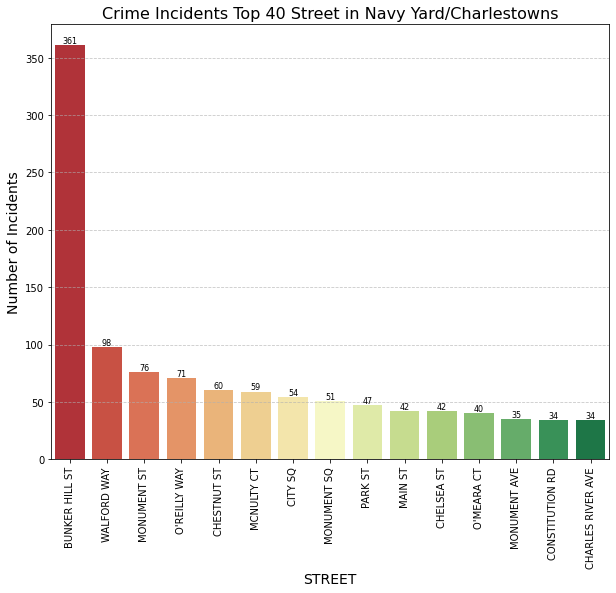

In [89]:
# Load the data

ata = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})

# Clean and prepare the data
data['STREET'] = data['STREET'].astype(str).str.strip()  # Remove leading/trailing whitespace from street
data = data.dropna(subset=['STREET', 'DISTRICT'])  # Remove rows with missing district or street


lat_min = 42.3680  # Minimum latitude (lower boundary)
lat_max = 42.3790  # Maximum latitude (upper boundary)
long_min = -71.0630  # Minimum longitude (west)
long_max = -71.0570  # Maximum longitude (east)




"""
42.3790,-71.0570

42.3680, -71.0630
Navy Yard

Maximum Latitude: 42.3790° N
Minimum Latitude: 42.3680° N
Maximum Longitude: -71.0570° W
Minimum Longitude: -71.0630° W


Main Street/Charlestown's

Maximum Latitude: 42.3785° N
Minimum Latitude: 42.3700° N
Maximum Longitude: -71.0590° W
Minimum Longitude: -71.0675° W


Bunker Hill 

Maximum Latitude: 42.3750° N
Minimum Latitude: 42.3690° N
Maximum Longitude: -71.0620° W
Minimum Longitude: -71.0700° W
"""


#change int boolean expression to make it true and false:


filtered_data = data[(data['Lat'] >= lat_min) & (data['Lat'] <= lat_max) &
                     (data['Long'] >= long_min) & (data['Long'] <= long_max)]

# Now you can proceed with your existing code to count crimes by street
filtered_data['DISTRICT'] = filtered_data['DISTRICT']
filtered_data.drop(['SHOOTING', 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                    'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Group by 'STREET' to count crimes per street
street_crime = filtered_data['STREET'].value_counts().reset_index()
street_crime.columns = ['STREET', 'COUNT']


# Sort streets by the count of crimes
street_crime = street_crime.sort_values(by='COUNT', ascending=False)

top_streets = street_crime.head(15) # need to make with street that have greater than 1000


# Plot the data with the default Seaborn palette
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='STREET', y='COUNT', data=top_streets, palette='RdYlGn')


# Add the crime counts as labels on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', ha="center", va="bottom", fontsize=8, color="black")

# Set plot labels and title
plt.xlabel('STREET', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Crime Incidents Top 40 Street in Navy Yard/Charlestowns', fontsize=16)
plt.xticks(rotation=90)  # Rotate street names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


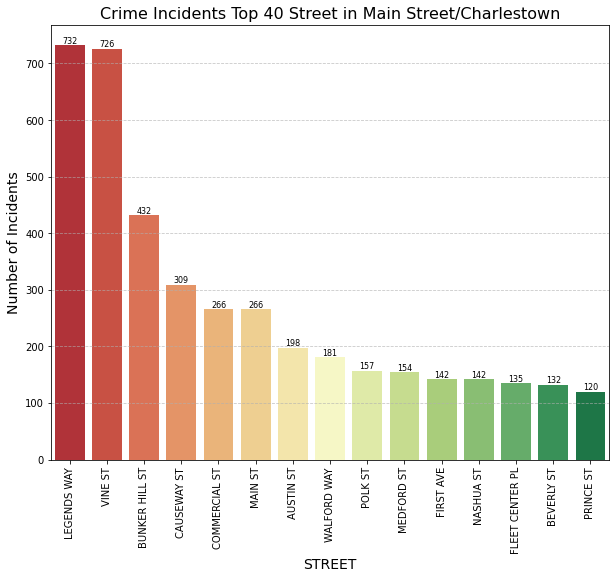

In [90]:
# Load the data

data = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})

# Clean and prepare the data
data['STREET'] = data['STREET'].astype(str).str.strip()  # Remove leading/trailing whitespace from street
data = data.dropna(subset=['STREET', 'DISTRICT'])  # Remove rows with missing district or street


lat_min = 42.3650  # Minimum latitude (lower boundary)
lat_max = 42.3800  # Maximum latitude (upper boundary)
long_min = -71.0700  # Minimum longitude (west)
long_max = -71.0500  # Maximum longitude (east)


"""
,-71.0570

, -71.0630
Navy Yard

Maximum Latitude: 42.3790° N
Minimum Latitude: 42.3680° N
Maximum Longitude: -71.0570° W
Minimum Longitude: -71.0630° W


Main Street/Charlestown's

Maximum Latitude: 42.3785° N
Minimum Latitude: 42.3700° N
Maximum Longitude: -71.0590° W
Minimum Longitude: -71.0675° W


Bunker Hill 

Maximum Latitude: 42.3750° N
Minimum Latitude: 42.3690° N
Maximum Longitude: -71.0620° W
Minimum Longitude: -71.0700° W
"""


#change int boolean expression to make it true and false:


filtered_data = data[(data['Lat'] >= lat_min) & (data['Lat'] <= lat_max) &
                     (data['Long'] >= long_min) & (data['Long'] <= long_max)]

# Now you can proceed with your existing code to count crimes by street
filtered_data['DISTRICT'] = filtered_data['DISTRICT']
filtered_data.drop(['SHOOTING', 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                    'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Group by 'STREET' to count crimes per street
street_crime = filtered_data['STREET'].value_counts().reset_index()
street_crime.columns = ['STREET', 'COUNT']


# Sort streets by the count of crimes
street_crime = street_crime.sort_values(by='COUNT', ascending=False)

top_streets = street_crime.head(15) # need to make with street that have greater than 1000


# Plot the data with the default Seaborn palette
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='STREET', y='COUNT', data=top_streets, palette='RdYlGn')


# Add the crime counts as labels on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', ha="center", va="bottom", fontsize=8, color="black")

# Set plot labels and title
plt.xlabel('STREET', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Crime Incidents Top 40 Street in Main Street/Charlestown', fontsize=16)
plt.xticks(rotation=90)  # Rotate street names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


#plt.show()
plt.savefig('Main_STR_Charlestown.jpg', format='jpg')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


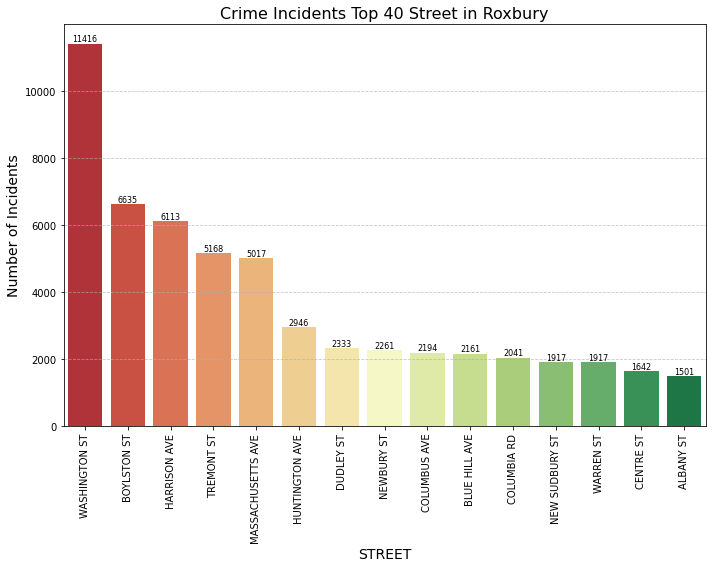

In [67]:

data = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})

# Clean and prepare the data
data['STREET'] = data['STREET'].astype(str).str.strip()  # Remove leading/trailing whitespace from street
data = data.dropna(subset=['STREET', 'DISTRICT'])  # Remove rows with missing district or street


lat_min =  42.3070  # Minimum latitude (can adjust as needed for which part of Roxbury)
lat_max = 42.3785 
long_min = -71.1110
long_max =  -71.0570
""" 

lat_min = 42.3285  # Minimum latitude (can adjust as needed for which part of Roxbury)
lat_max = 42.3297 
long_min = -71.0855
long_max =  -71.0847

"""



'''
 all roxbury
Minimum Latitude: 42.3070° N
Maximum Latitude: 42.3750° N
Minimum Longitude: -71.1110° W
Maximum Longitude: -71.0570° W


need to make this into the boolean...Nubian Square

Latitude:
Minimum: 42.3285°N
Maximum: 42.3297°N
Longitude:
Minimum: -71.0855°W
Maximum: -71.0847°W'


Fort Hill area:

Minimum Latitude: 42.3190° N
Maximum Latitude: 42.3255° N
Minimum Longitude: -71.0875° W
Maximum Longitude: -71.0770° W


Roxbury and Jamaica Plain
Minimum Latitude: 42.3080° N
Maximum Latitude: 42.3200° N
Minimum Longitude: -71.1100° W
Maximum Longitude: -71.0850° W


Lower Roxbury area:

Minimum Latitude: 42.3375° N
Maximum Latitude: 42.3500° N
Minimum Longitude: -71.0950° W
Maximum Longitude: -71.0800° W

''' 


#change int boolean expression to make it true and false:


filtered_data = data[(data['Lat'] >= lat_min) & (data['Lat'] <= lat_max) &
                     (data['Long'] >= long_min) & (data['Long'] <= long_max)]

# Now you can proceed with your existing code to count crimes by street
filtered_data['DISTRICT'] = filtered_data['DISTRICT'].replace({'B2': 'Roxbury'})
filtered_data.drop(['SHOOTING', 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                    'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Group by 'STREET' to count crimes per street
street_crime = filtered_data['STREET'].value_counts().reset_index()
street_crime.columns = ['STREET', 'COUNT']


# Sort streets by the count of crimes
street_crime = street_crime.sort_values(by='COUNT', ascending=False)

top_streets = street_crime.head(15) # need to make with street that have greater than 1000


# Plot the data with the default Seaborn palette
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='STREET', y='COUNT', data=top_streets, palette='RdYlGn')


# Add the crime counts as labels on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', ha="center", va="bottom", fontsize=8, color="black")

# Set plot labels and title
plt.xlabel('STREET', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Crime Incidents Top 15 Street in Roxbury', fontsize=16)
plt.xticks(rotation=90)  # Rotate street names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
#plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


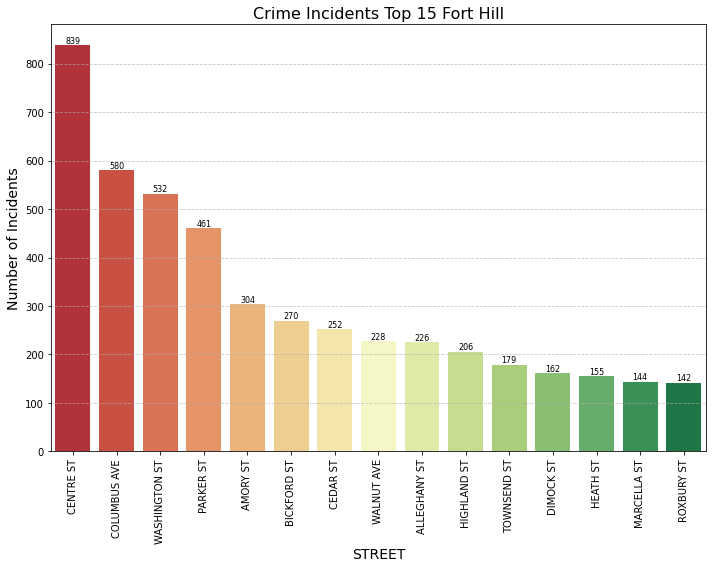

In [97]:

data = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})

# Clean and prepare the data
data['STREET'] = data['STREET'].astype(str).str.strip()  # Remove leading/trailing whitespace from street
data = data.dropna(subset=['STREET', 'DISTRICT'])  # Remove rows with missing district or street

lat_min = 42.3170  # Minimum latitude (can adjust as needed for which part of Roxbury)
lat_max = 42.3310 
long_min = -71.1030
long_max =  -71.0865


'''
all roxbury
Minimum Latitude: 42.3070° N
Maximum Latitude: 42.3750° N
Minimum Longitude: -71.1110° W
Maximum Longitude: -71.0570° W


need to make this into the boolean...Nubian Square

Latitude:
Minimum: 42.3285°N
Maximum: 42.3297°N
Longitude:
Minimum: -71.0855°W
Maximum: -71.0847°W'


Fort Hill area:

Minimum Latitude: 42.3190° N
Maximum Latitude: 42.3255° N
Minimum Longitude: -71.0875° W
Maximum Longitude: -71.0770° W


Roxbury and Jamaica Plain
Minimum Latitude: 42.3080° N
Maximum Latitude: 42.3200° N
Minimum Longitude: -71.1100° W
Maximum Longitude: -71.0850° W


Lower Roxbury area:

Minimum Latitude: 42.3375° N
Maximum Latitude: 42.3500° N
Minimum Longitude: -71.0950° W
Maximum Longitude: -71.0800° W

''' 


#change int boolean expression to make it true and false:


filtered_data = data[(data['Lat'] >= lat_min) & (data['Lat'] <= lat_max) &
                     (data['Long'] >= long_min) & (data['Long'] <= long_max)]

# Now you can proceed with your existing code to count crimes by street
filtered_data['DISTRICT'] = filtered_data['DISTRICT'].replace({'B2': 'Roxbury'})
filtered_data.drop(['SHOOTING', 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                    'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Group by 'STREET' to count crimes per street
street_crime = filtered_data['STREET'].value_counts().reset_index()
street_crime.columns = ['STREET', 'COUNT']


# Sort streets by the count of crimes
street_crime = street_crime.sort_values(by='COUNT', ascending=False)

top_streets = street_crime.head(15) # need to make with street that have greater than 1000


# Plot the data with the default Seaborn palette
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='STREET', y='COUNT', data=top_streets, palette='RdYlGn')


# Add the crime counts as labels on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', ha="center", va="bottom", fontsize=8, color="black")

# Set plot labels and title
plt.xlabel('STREET', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Crime Incidents Top 15 Fort Hill', fontsize=16)
plt.xticks(rotation=90)  # Rotate street names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

#plt.savefig('Roxbury_STR_crime.jpg', format='jpg')



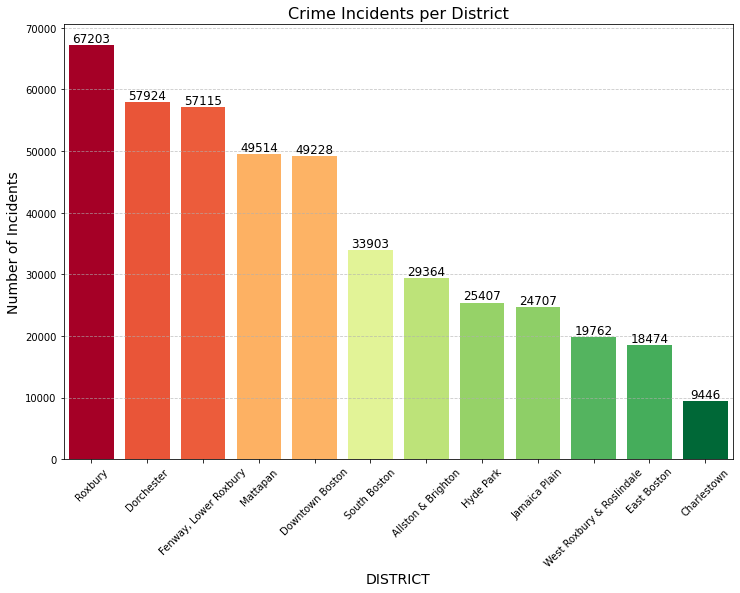

<Figure size 432x288 with 0 Axes>

In [64]:
data = pd.read_csv(file_path, low_memory=False, encoding="utf-8",
                   dtype={'DISTRICT': str, 'OFFENSE_CODE': str, 'OFFENSE_DESCRIPTION': str, 'OCCURRED_ON_DATE': str,
                          'STREET': str})

# Clean up and filter valid districts
valid_districts = {'A1', 'A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18'}
data = data.dropna(subset=['DISTRICT'])  # Remove NaN values
data['DISTRICT'] = data['DISTRICT'].astype(str).str.strip()  # Remove extra spaces
data = data[data['DISTRICT'].isin(valid_districts)]  # Filter valid districts

# Sort data
sorted_data = data.sort_values(by=['DISTRICT'], ascending=True)

# Replace district names with full names
sorted_data['DISTRICT'] = sorted_data['DISTRICT'].replace({
    'A1': 'Downtown Boston', 'A7': 'East Boston',
    'A15': 'Charlestown', 'B2': 'Roxbury', 'B3': 'Mattapan',
    'C6': 'South Boston', 'C11': 'Dorchester', 'D4': 'Fenway, Lower Roxbury',
    'D14': 'Allston & Brighton', 'E5': 'West Roxbury & Roslindale',
    'E13': 'Jamaica Plain', 'E18': 'Hyde Park'
})

# Drop unnecessary columns
sorted_data.drop(['SHOOTING', 'Lat', 'Long', 'REPORTING_AREA', 'UCR_PART', 'INCIDENT_NUMBER', 'OFFENSE_CODE',
                  'DAY_OF_WEEK', 'HOUR'], axis=1, inplace=True)

# Sample every 3rd row


# Count incidents per district

district_counts = sorted_data['DISTRICT'].value_counts().reset_index()
district_counts.columns = ['DISTRICT', 'COUNT']
district_counts = district_counts.sort_values(by="COUNT", ascending=False)  # Sort

cmap = plt.get_cmap('RdYlGn_r')
# Reverse the colormap
# Choose the colormap you want
norm = mcolors.Normalize(vmin=district_counts['COUNT'].min(), vmax=district_counts['COUNT'].max())  # Normalize based on the COUNT values

# Plot the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='DISTRICT', y='COUNT', data=district_counts, palette=cmap(norm(district_counts['COUNT'])))




for p in ax.patches:
    p.set_facecolor(cmap(norm(p.get_height())))

for p in ax.patches:
    # Get the height of each bar (crime count)
    height = p.get_height()

    # Place the text on top of each bar
    ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}',
            ha="center", va="bottom", fontsize=12, color="black")

plt.xlabel('DISTRICT', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Crime Incidents per District', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.tight_layout()